# Name: Sayali Suresh Ranjane
# Gmail: sayaliranjane28@gmail.com
# LinkedIn:https://www.linkedin.com/in/sayali-ranjane-595606187/
# GitHub: https://github.com/Sayaliranjane/Analysis
# Task-4 Exploratory Data Analysis - Sports

##### Problem Statement: Perform Exploratory Data Analysis on 'Indian Premiere League'
##### As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
##### Suggest teams or players a company should endorse for its products

In [1]:
# libraries required
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv(r"C:\Users\91968\Downloads\spark found\matches.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
# Loading 2nd Dataset
deliveries = pd.read_csv(r"C:\Users\91968\Downloads\spark found\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### merge two dataset

In [9]:
data = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
matches.id.is_unique

True

#### since id is unique we can set this as our index

In [13]:
matches.set_index('id', inplace=True)

In [14]:
#Summary statistics of matches data
matches.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2010-03-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing
#### Here we will perform Data Preprocessing on our matches dataset first, to make the data usable for EDA.

In [15]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
matches.isna().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [17]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [18]:
# missing values can be filled with Dubai
matches.city = matches.city.fillna('Dubai')

In [19]:
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [20]:
matches = matches.drop('umpire3', axis = 1)

In [21]:
print(len(matches['team1'].unique()))
print(len(matches['team2'].unique()))
print(len(matches['winner'].unique()))
print(len(matches['city'].unique()))
print(len(matches['venue'].unique()))

15
15
16
33
41


In [22]:
#city has 33 distinct values while we have 41 venues.
#Let's find out venues grouped by cities to see which cities have multiple venues
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df.head(7)

season
city         venue                               
Abu Dhabi    Sheikh Zayed Stadium               7
Ahmedabad    Sardar Patel Stadium, Motera      12
Bangalore    M Chinnaswamy Stadium             66
Bengaluru    M Chinnaswamy Stadium              7
             M. Chinnaswamy Stadium             7
Bloemfontein OUTsurance Oval                    2
Cape Town    Newlands                           7

""" 
Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them
Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there
Mumbai has 3 stadiums/venues used for IPL
Pune has 2 venues for IPL 
"""

In [23]:
v = pd.crosstab(matches['city'],matches['venue'])

Text(0.5, 1.0, 'Number of stadiums in different cities')

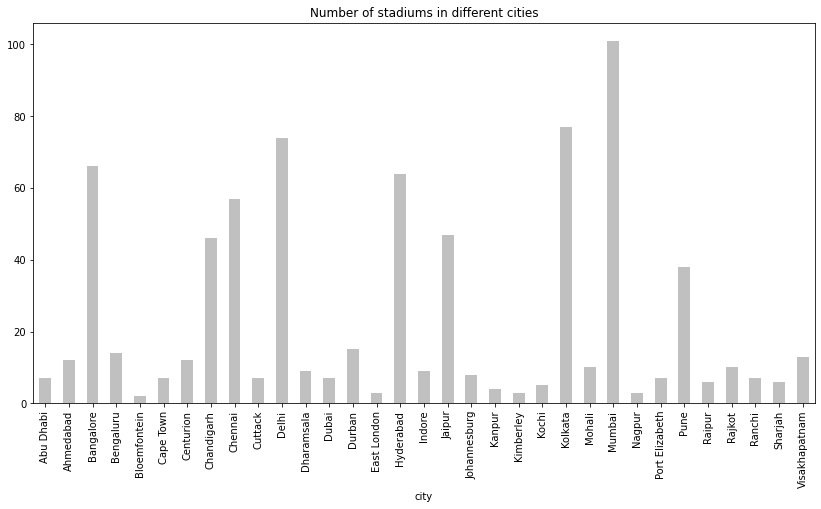

In [24]:
### Visual representation of number of venues in each city .
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']
#Plotting
plt.figure(figsize = (14,7))
b.plot(kind = 'bar', color = 'silver')
plt.title("Number of stadiums in different cities")

### Exploratory Data Analysis:

#### Number of matches played in each season

<AxesSubplot:xlabel='season', ylabel='count'>

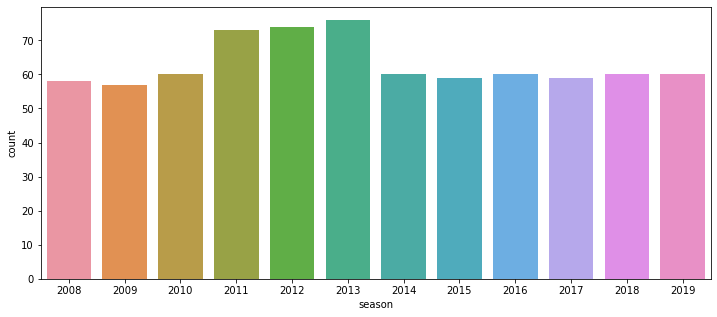

In [25]:
plt.figure(figsize=(12,5))
sns.countplot('season', data = matches)

#### 2011-2013 have more matches being played than other seasons

#### All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

#### How many teams played in each season?

Text(0.5, 0, 'Season')

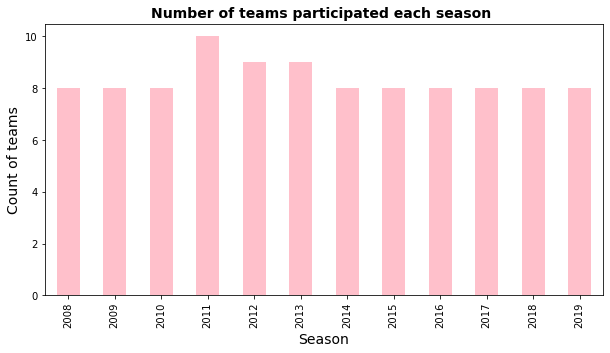

In [26]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(10,5), color = 'pink')
plt.title("Number of teams participated each season ",fontsize=14,fontweight="bold")
plt.ylabel("Count of teams", size = 14)
plt.xlabel("Season", size = 14)

#### 10 teams played in 2011 and 9 teams each in 2012 and 2013

#### This explains why 2011-2013 have seen more matches being played than other seasons

### Venue which has hosted most number of IPL matches 

Text(0.5, 1.0, 'Venue which has hosted most number of IPL matches')

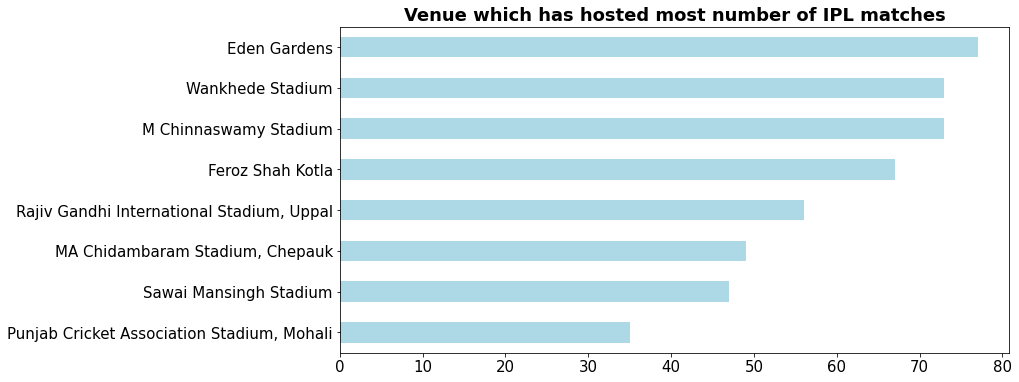

In [27]:
matches.venue.value_counts().sort_values().tail(8).plot(kind = 'barh',figsize=(12,6), fontsize=15, color='lightblue')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")

##### M Chinnaswamy Stadium in Bengaluru has hosted the highest number of matches so far in IPL followed by Eden Gardens in Kolkata

#### Which team has maximum wins in IPL so far?

In [28]:
#creating a dataframe with season and winner columns
winning_teams = matches[['season','winner']]

In [29]:
#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

Text(0.5, 0, 'Frequency')

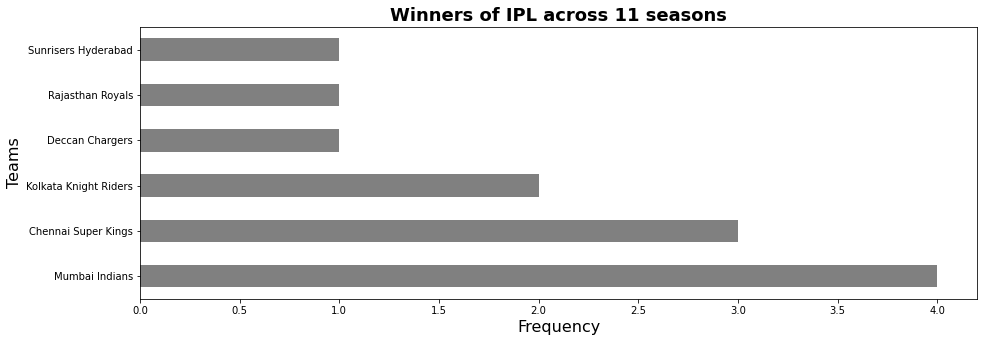

In [30]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'grey')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 16)
plt.xlabel("Frequency", size = 16)

##### MI and CSK have both won 3 times each followed by KKR who has won 2 times.
##### Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

#### Does teams choosed to bat or field first, after winning toss

<AxesSubplot:ylabel='toss_decision'>

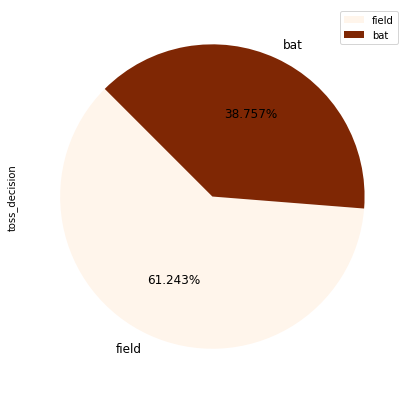

In [31]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=12, autopct='%2.3f%%', 
                                               figsize=(12,7), startangle=135, legend=True, cmap='Oranges')

##### Close to 60% times teams who have won tosses have decided to chase down

#### How toss decision affects match results

Text(0.5, 1.0, 'How Toss Decision affects match result')

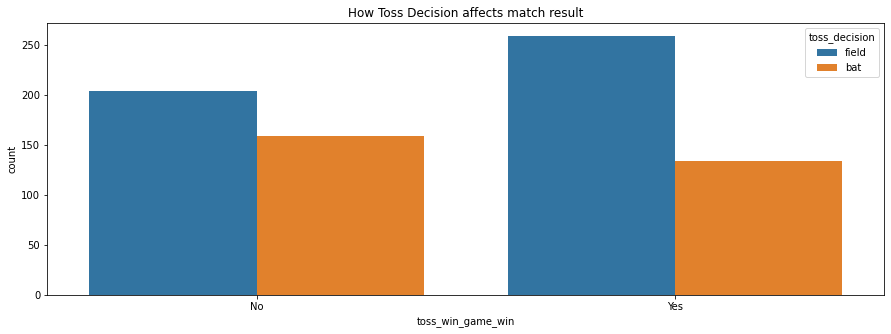

In [32]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result")

##### Teams winning tosses and electng to field first have won most number of times

#### Individual teams decision to choose bat or field after winning toss

Text(0.5, 1.0, 'Teams decision to bat first or second after winning toss')

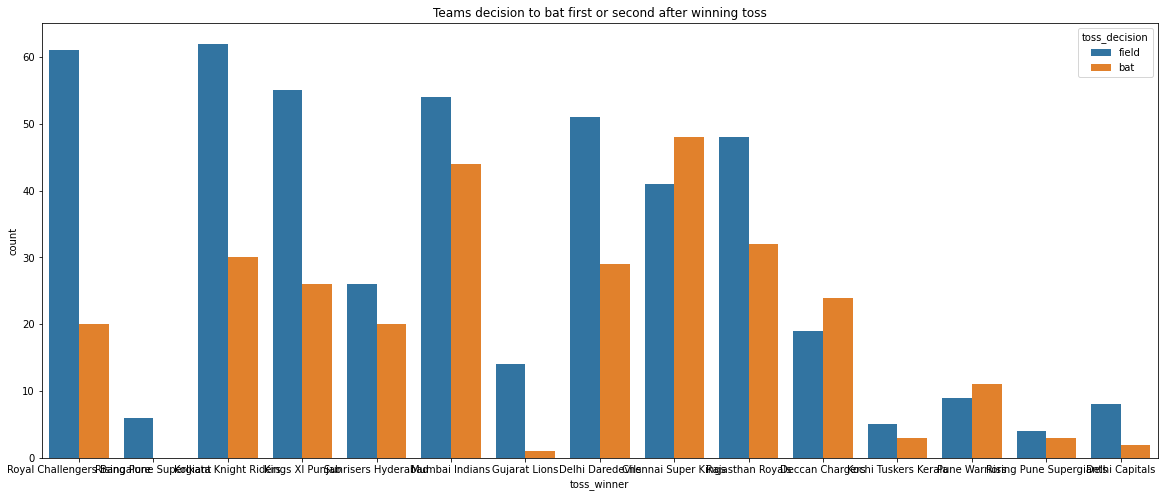

In [33]:
plt.figure(figsize = (20,8))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss")

##### Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.

#### Which player's performance has mostly led team's win?

Text(0.5, 1.0, 'Top 10 players with most MoM awards')

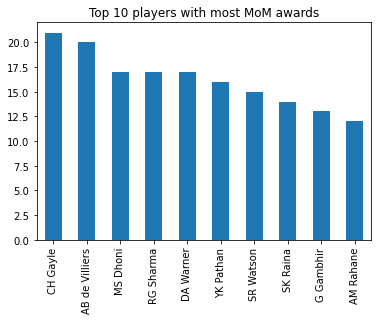

In [34]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar')
plt.title("Top 10 players with most MoM awards")

##### Chris Gayle has so far won the most number of MoM awards followed by AB de Villiers.
Also, all top 10 are batsmen which kind of hints that in IPL batsmen have mostly dictated the matches

#### How winning matches by fielding first varies across venues?

Text(0.5, 1.0, 'How winning matches by fielding first varies across venues?')

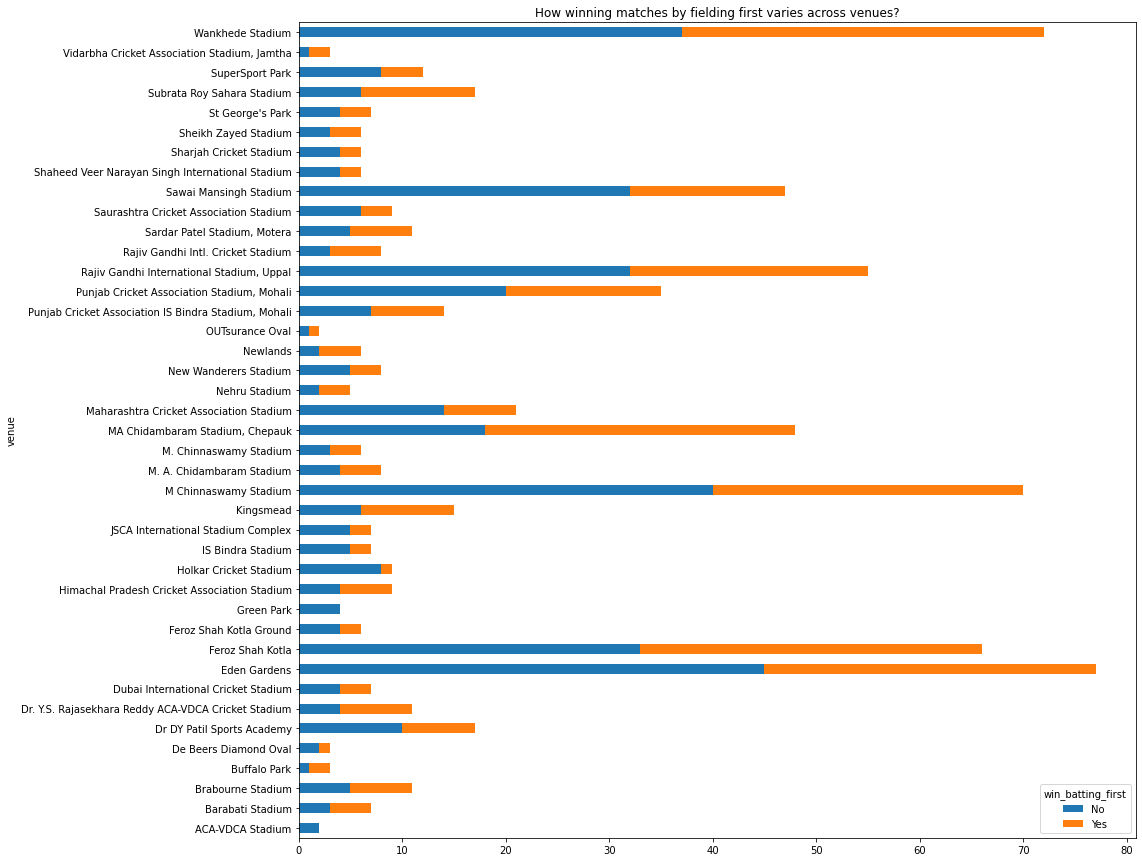

In [35]:
new_matches = matches[matches['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?")

##### Batting second has been more rewarding in almost all the venues

#### Is batting second advantageous across all years?

Text(0.5, 1.0, 'Is batting second advantageous across all years')

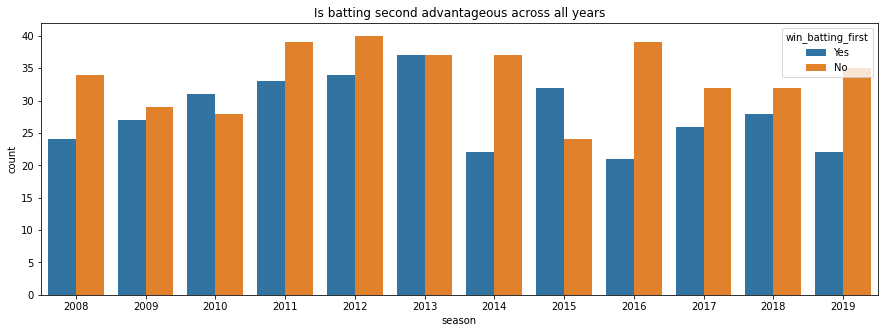

In [36]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years")

##### Exceptt for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches

#### Teams total scoring runs, over the years

Text(0, 0.5, 'Total Runs Scored')

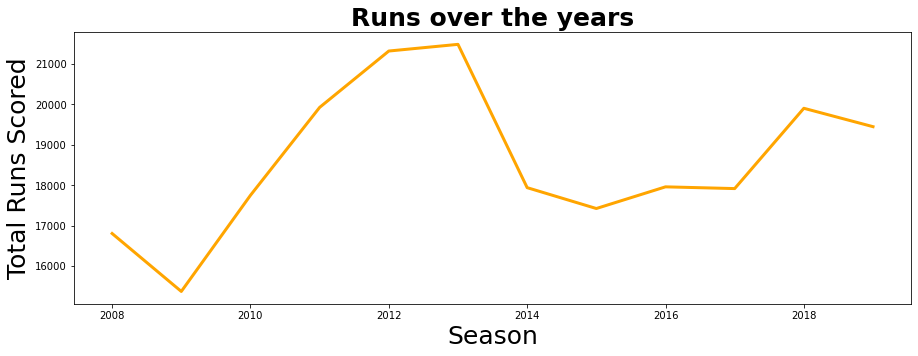

In [43]:
data.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'orange')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)

##### Run scoring has gone up from the start of the IPL in 2008

#### Top Run Getters of IPL

Text(0.5, 1.0, 'Top Run Getters of IPL')

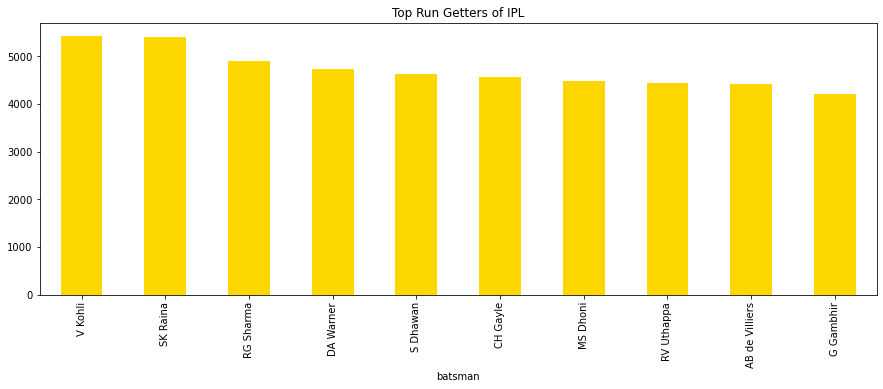

In [44]:
#let's plot the top 10 run getter so far in IPL
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'gold',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL")

#### Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat
#### Suresh Raina is the highest run getter in IPL.

### Which batsman has been most consistent among top 10 run getters?

Text(0.5, 1.0, 'Most Consistent batsmen of IPL')

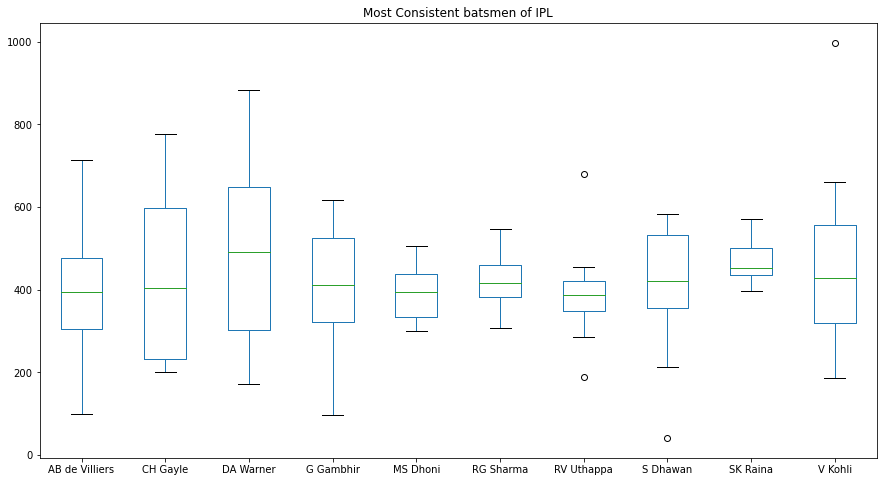

In [46]:
consistent_batsman = data[data.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]
consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL")

##### Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 11 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all

#### Which bowlers have performed the best

Text(0.5, 1.0, 'Top Wicket Takers of IPL')

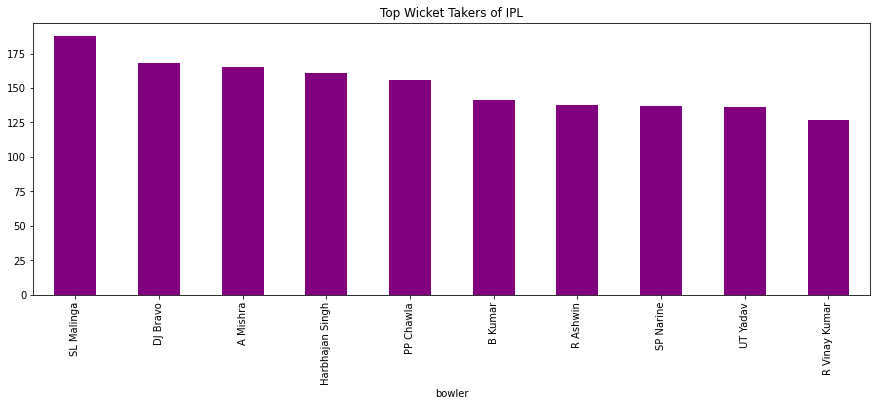

In [47]:
data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL")

#### Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra
#### In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners
#### All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners
#### All 5 pacers are right arm pacers

### Batsmen with the best strike rates over the years

In [49]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(data.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(data.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(data.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


Text(0.5, 1.0, 'Highest strike rates in IPL')

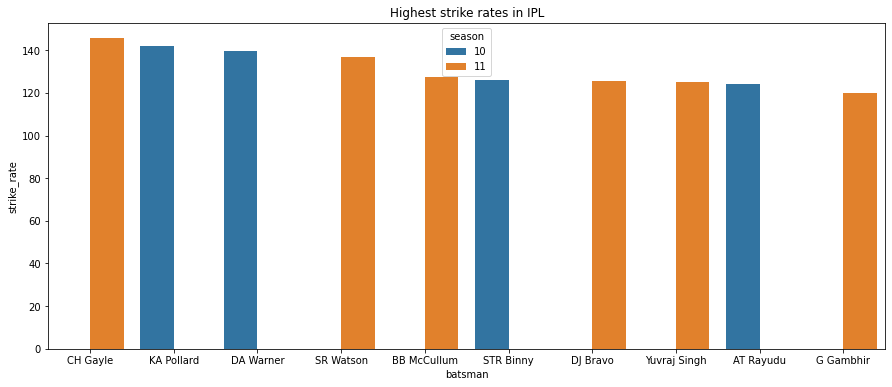

In [50]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL")

#### AB de Villiers, Gayle have the highest strike rates in IPL. They are the big hitters and can win any match on their day
#### One surprise here is that Harbhajan Singh who is a bowler has a strike rate of 130+ and comes before Rohit Sharma in ranking

### Bowlers with maximum number of extras

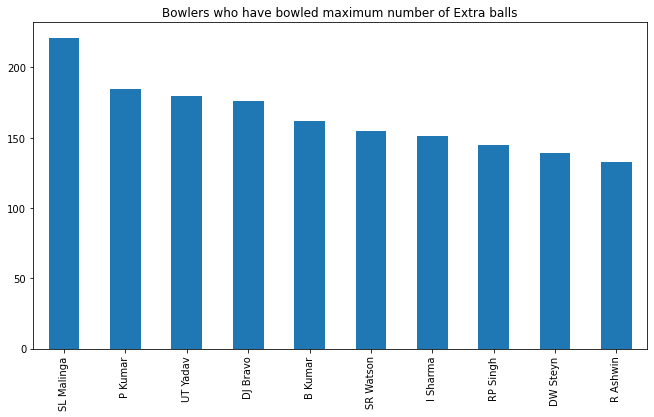

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [51]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')
plt.show()
extra = pd.DataFrame(extra)
extra.T

#### Which bowlers have picked up wickets more frequently?

In [53]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(data.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(data[data['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(data.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [54]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


In [ ]:
Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:
Mumbai Indians is the most successful team in IPL and has won the most number of toss.
There were more matches won by chasing the total(419 matches) than defending(350 matches).
When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
The Mumbai city has hosted the most number of IPL matches.
Chris Gayle has won the maximum number of player of the match title.
S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
Eden Gardens has hosted the maximum number of IPL matches.
If a team wins a toss choose to field first as it has highest probablity of winning

In [ ]:
Q2. Teams or Players a company should endorse for its products.
If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...
If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum
If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla
If the franchise need a bowler with good economy then go for DW Steyn ,M Muralitharan ,R Ashwin,SP Narine ,Harbhajan Singh